In [ ]:
#Install dependencies 

!pip install pyjanitor pyvis --quiet

In [ ]:
#Load libraries

import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [ ]:
#Load data

df_ori = pd.read_csv("https://raw.githubusercontent.com/iliaszografos/deep_learning/main/Connections.csv?token=GHSAT0AAAAAABS7GQGL7LONZEOAZMLQCJY6YSCCTSA", skiprows=2)

In [ ]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     1259 non-null   object
 1   Last Name      1259 non-null   object
 2   Email Address  22 non-null     object
 3   Company        1236 non-null   object
 4   Position       1236 non-null   object
 5   Connected On   1272 non-null   object
dtypes: object(6)
memory usage: 59.8+ KB


In [ ]:
#Data cleaning

df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

,company,position,connected_on
0,Joblogic-X Corporation,Data Scientist,2022-03-25
1,The London School of Economics and Political S...,Visiting Fellow,2022-03-25
2,AkzoNobel,Data Scientist,2022-03-24
3,Dreamdata.io,Account Executive,2022-03-24
4,Visual Artificial Intelligence Laboratory @ Ox...,Neurosymbolic AI Researcher,2022-03-24


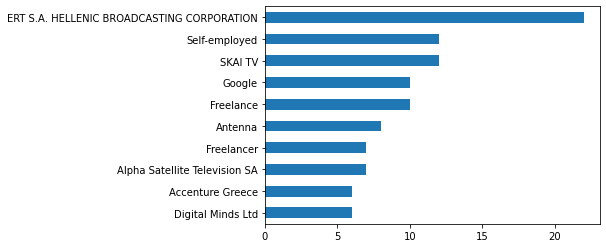

In [ ]:
#Exploratory Data Analysis

df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

In [ ]:
pattern = "freelance|self-employed"
df = df[~df['company'].str.contains(pattern, case=False)]

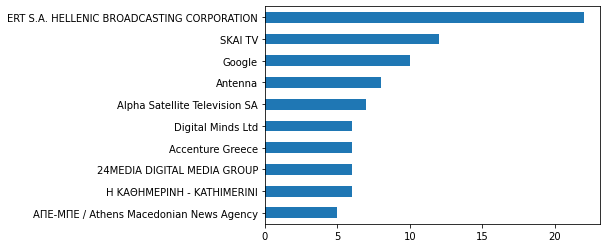

In [ ]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis()

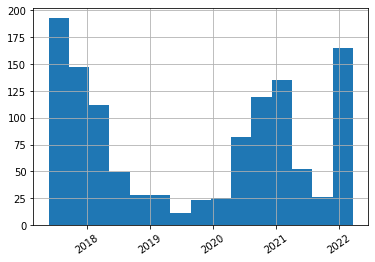

In [ ]:
#Month connected on Histogram

df['connected_on'].hist(xrot=35, bins=15);

In [ ]:
#Aggregate position and connection columns

df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

,company,count
0,ERT S.A. HELLENIC BROADCASTING CORPORATION,22
1,SKAI TV,12
2,Google,10
3,Antenna,8
4,Alpha Satellite Television SA,7
5,Digital Minds Ltd,6
6,Accenture Greece,6
7,24MEDIA DIGITAL MEDIA GROUP,6
8,Η ΚΑΘΗΜΕΡΙΝΗ - KATHIMERINI,6
13,Socialab,5


In [ ]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Journalist,42
1,Founder,18
2,Editor In Chief,16
3,Data Scientist,14
4,Editor,12
5,Co-Founder,11
6,Social Media Manager,9
8,Data Analyst,8
7,Marketing Manager,8
9,News Editor,7


In [ ]:
#Creating the network

nt = net.Network(notebook=True)

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')
display(HTML('nodes.html'))

In [ ]:
#Get number of nodes and edges

print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

number of nodes: 4
number of edges: 3


In [ ]:
for _, row in df_company.head(5).iterrows():
  print(row['company'] + "-" + str(row['count']))

ERT S.A. HELLENIC BROADCASTING CORPORATION-22
SKAI TV-12
Google-10
Antenna-8
Alpha Satellite Television SA-7


In [ ]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(962, 2)
(18, 2)


In [ ]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

(907, 2)
(19, 2)


In [ ]:
#Creating network for connections

# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['company']
  count = row['count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')
display(HTML('company_graph.html'))

In [ ]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_position_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']
  
  g.add_node(position, size=count, color='#3449eb', title=count)
  g.add_edge('root', position, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('position_graph.html')
display(HTML('position_graph.html'))